In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/FinancialMarketData.xlsx - EWS.csv'  # Adjust based on the uploaded file's name
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

   Y       Data  XAU BGNL  ECSURPUS    BDIY     CRY     DXY     JPY    GBP  \
0  0  1/11/2000    283.25     0.077  1388.0  157.26  100.56  105.86  1.646   
1  0  1/18/2000    287.65     0.043  1405.0  165.01  101.86  105.47  1.638   
2  0  1/25/2000    287.15     0.135  1368.0  167.24  102.41  106.04  1.650   
3  0   2/1/2000    282.75     0.191  1311.0  166.85  104.92  107.85  1.611   
4  1   2/8/2000    298.40     0.312  1277.0  165.43  104.22  109.30  1.611   

     Cl1  ...  LP01TREU  EMUSTRUU  LF94TRUU     MXUS    MXEU     MXJP    MXBR  \
0  25.77  ...   116.464   230.527   123.762  1416.12  127.75   990.59  856.76   
1  28.85  ...   117.267   231.377   123.762  1428.79  129.50   993.98  925.22   
2  28.28  ...   117.995   232.390   123.762  1385.93  126.48   974.83  886.93   
3  28.22  ...   120.510   231.942   122.328  1385.31  129.19  1007.12  842.60   
4  28.02  ...   118.791   237.812   122.328  1411.95  134.67  1034.58  945.15   

     MXRU    MXIN   MXCN  
0  224.33  217.34

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check column data types
print(data.dtypes)

# Display a statistical summary
print(data.describe())


Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64
Y              int64
Data          object
XAU BGNL     float64
ECSURPUS     float64
BDIY         float64
CRY          float64
DXY          float64
JPY          float64
GBP          float64
Cl1          float64
VIX          float64
USGG30YR     float64
GT10         float64
USGG2YR      float64
USGG3M       float64
US0001M     

In [ ]:
# Convert 'Data' column to datetime
data['Data'] = pd.to_datetime(data['Data'], errors='coerce')

# Verify the conversion
print(data['Data'].head())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns but exclude 'Y'
numeric_cols = data.drop(columns=['Y', 'Data']).select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to the features
data_scaled = data.copy()  # Create a copy to preserve the original
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verify that 'Y' is not scaled
print(data_scaled[['Y']].head())  # This should show the original values of Y
print(data_scaled[numeric_cols].head())

   Y
0  0
1  0
2  0
3  0
4  1
   XAU BGNL  ECSURPUS      BDIY       CRY       DXY       JPY       GBP  \
0 -1.424377  0.116941 -0.432277 -1.289247  0.846232 -0.058102  0.359670   
1 -1.415478  0.019602 -0.423848 -1.175690  0.960528 -0.088487  0.321978   
2 -1.416489  0.282989 -0.442193 -1.143014  1.008884 -0.044078  0.378516   
3 -1.425389  0.443312 -0.470454 -1.148729  1.229563  0.096943  0.194769   
4 -1.393734  0.789723 -0.487312 -1.169535  1.168019  0.209916  0.194769   

        Cl1       VIX  USGG30YR  ...  LP01TREU  EMUSTRUU  LF94TRUU      MXUS  \
0 -1.349527  0.290316  2.345088  ... -1.052589 -1.529483 -1.782480 -0.273397   
1 -1.230558  0.174552  2.409601  ... -1.045280 -1.526739 -1.782480 -0.255250   
2 -1.252575  0.350514  2.313680  ... -1.038654 -1.523470 -1.782480 -0.316639   
3 -1.254892  0.400292  2.134571  ... -1.015763 -1.524916 -1.801373 -0.317527   
4 -1.262618  0.145611  1.971591  ... -1.031409 -1.505969 -1.801373 -0.279370   

       MXEU      MXJP      MXBR      M

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data_scaled.drop(columns=['Y', 'Data'])  # Exclude 'Y' and 'Data'
y = data_scaled['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (888, 42)
Testing set size: (223, 42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8878923766816144
Confusion Matrix:
 [[168   9]
 [ 16  30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       177
           1       0.77      0.65      0.71        46

    accuracy                           0.89       223
   macro avg       0.84      0.80      0.82       223
weighted avg       0.88      0.89      0.88       223



Y
0    874
1    237
Name: count, dtype: int64


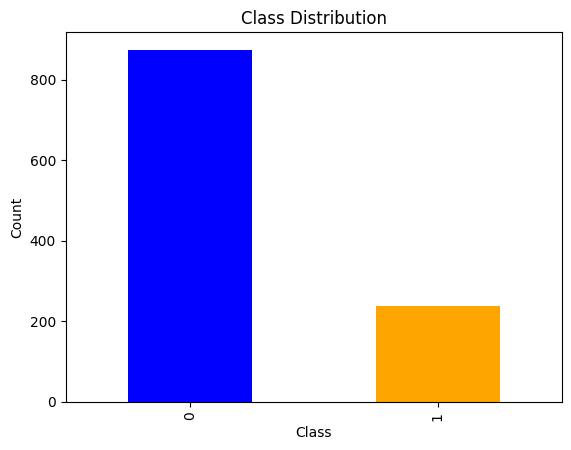

In [ ]:
# Check the distribution of the target variable
print(y.value_counts())

# Optional: Visualize the distribution
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
# Train logistic regression with class weights
model_weighted = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
model_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))


Accuracy: 0.852017937219731
Confusion Matrix:
 [[153  24]
 [  9  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       177
           1       0.61      0.80      0.69        46

    accuracy                           0.85       223
   macro avg       0.78      0.83      0.80       223
weighted avg       0.87      0.85      0.86       223



In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:", y_train_smote.value_counts())


Class distribution after SMOTE: Y
0    697
1    697
Name: count, dtype: int64


In [ ]:
# Train logistic regression on balanced data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))


Accuracy: 0.8654708520179372
Confusion Matrix:
 [[156  21]
 [  9  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       177
           1       0.64      0.80      0.71        46

    accuracy                           0.87       223
   macro avg       0.79      0.84      0.81       223
weighted avg       0.88      0.87      0.87       223



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'class_weight': ['balanced']  # Keep class weights balanced
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 score
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Display the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, class_weight=balanced, solver=liblinear; total time=   0.0s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END ........C=0.01, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.1, class_weight=balanced, solver=liblinear; total time=   0.1s
[CV] END .....C=0.1, class_weight=balanced, solv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.2s
[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.2s
[CV] END ..........C=10, class_weight=balanced, solver=lbfgs; total time=   0.1s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   0.2s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   0.1s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   0.1s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   0.1s
[CV] END .....C=100, class_weight=balanced, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.3s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.2s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.2s
[CV] END .........C=100, class_weight=balanced, solver=lbfgs; total time=   0.2s
Best Parameters: {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best F1 Score: 0.8893950343482709


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))


Accuracy: 0.874439461883408
Confusion Matrix:
 [[157  20]
 [  8  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       177
           1       0.66      0.83      0.73        46

    accuracy                           0.87       223
   macro avg       0.80      0.86      0.82       223
weighted avg       0.89      0.87      0.88       223



Top 10 Important Features:
      Feature  Coefficient  AbsCoefficient
14   GTDEM30Y    17.006180       17.006180
32   LP01TREU    13.931783       13.931783
15   GTDEM10Y   -13.238110       13.238110
31   LG30TRUU   -10.811828       10.811828
9    USGG30YR   -10.222813       10.222813
34   LF94TRUU    -9.206032        9.206032
27   LUMSTRUU     8.178670        8.178670
40       MXIN     6.499634        6.499634
19  GTITL10YR     5.386651        5.386651
18  GTITL30YR    -5.262561        5.262561


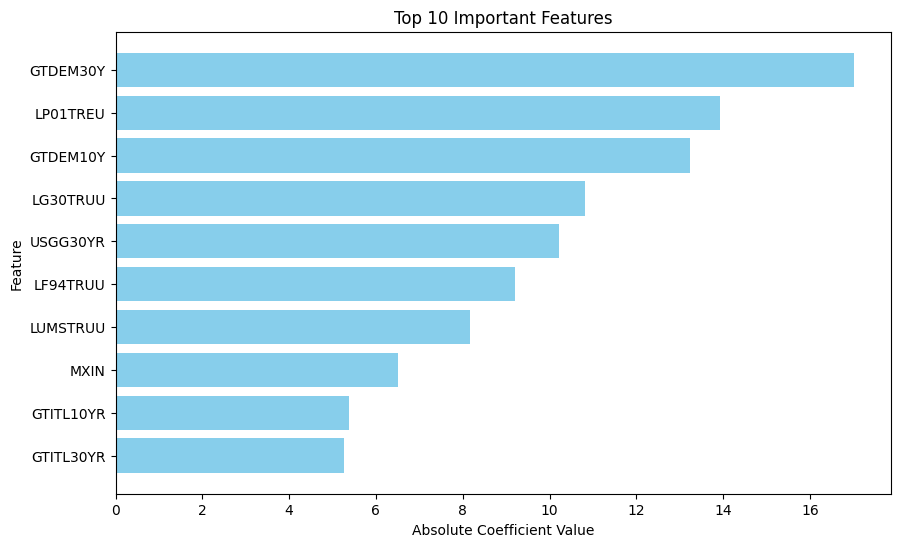

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the feature names and their corresponding coefficients
feature_names = X_train.columns
coefficients = best_model.coef_[0]  # Coefficients for the first (and only) class

# Create a DataFrame to store the feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficients
feature_importance['AbsCoefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Display the top features
print("Top 10 Important Features:")
print(feature_importance.head(10))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['AbsCoefficient'][:10], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
# Compute correlations with the target variable
correlation_matrix = data.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix['Y'].sort_values(ascending=False)

# Display the top correlations
print("Top 10 Correlations with Y:")
print(correlation_with_target.head(10))

# Display the bottom correlations
print("\nBottom 10 Correlations with Y:")
print(correlation_with_target.tail(10))


Top 10 Correlations with Y:
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
Name: Y, dtype: float64

Bottom 10 Correlations with Y:
LUACTRUU   -0.153544
LF94TRUU   -0.156550
EMUSTRUU   -0.169475
MXIN       -0.188942
LF98TRUU   -0.189661
MXUS       -0.193928
LG30TRUU   -0.197232
LP01TREU   -0.209774
MXEU       -0.253877
MXJP       -0.279399
Name: Y, dtype: float64


<ipython-input-22-317c66fa62ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


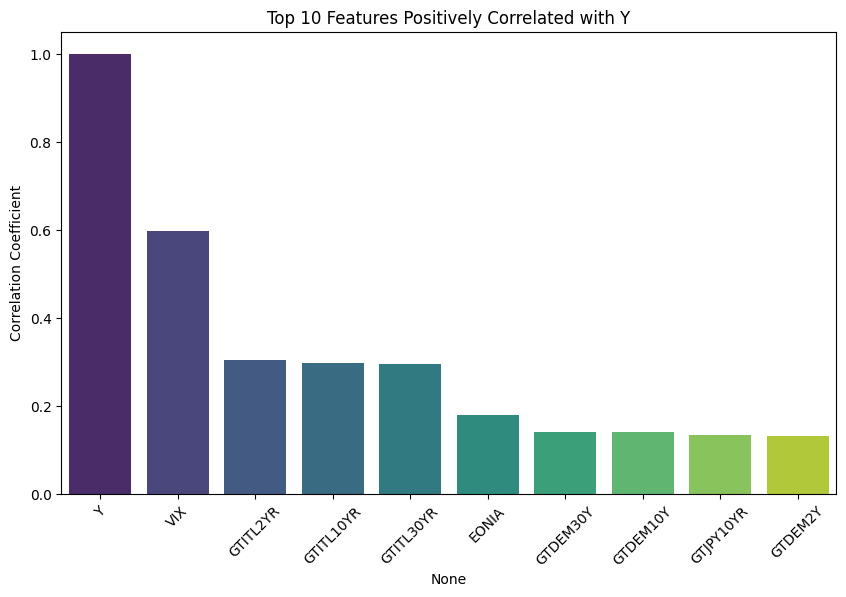

<ipython-input-22-317c66fa62ab>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


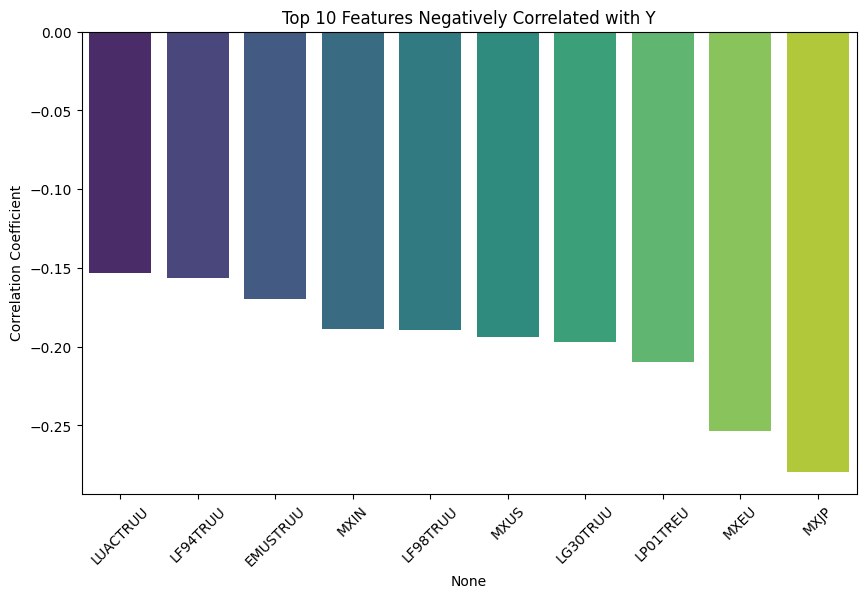

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 10 positively correlated features
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_target.head(10).index,
    y=correlation_with_target.head(10).values,
    palette='viridis'
)
plt.title('Top 10 Features Positively Correlated with Y')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

# Plot the top 10 negatively correlated features
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_target.tail(10).index,
    y=correlation_with_target.tail(10).values,
    palette='viridis'
)
plt.title('Top 10 Features Negatively Correlated with Y')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print("Available features in X_train:")
print(X_train.columns.tolist())


Available features in X_train:
['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']


In [ ]:
# Select the refined feature set
refined_features = ['VIX', 'GTDEM30Y', 'GTDEM10Y', 'GTITL2YR',
                    'GTITL10YR', 'GTITL30YR', 'EONIA', 'MXEU',
                    'MXIN', 'LP01TREU']

X_train_refined = X_train[refined_features]
X_test_refined = X_test[refined_features]

# Train logistic regression on the refined feature set
refined_model = LogisticRegression(random_state=42, class_weight='balanced')
refined_model.fit(X_train_refined, y_train)

# Make predictions
y_pred_refined = refined_model.predict(X_test_refined)

# Evaluate the refined model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_refined))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_refined))
print("Classification Report:\n", classification_report(y_test, y_pred_refined))


Accuracy: 0.8251121076233184
Confusion Matrix:
 [[147  30]
 [  9  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       177
           1       0.55      0.80      0.65        46

    accuracy                           0.83       223
   macro avg       0.75      0.82      0.77       223
weighted avg       0.86      0.83      0.84       223



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Train the model on the full feature set
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.8968609865470852
Confusion Matrix:
 [[169   8]
 [ 15  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       177
           1       0.79      0.67      0.73        46

    accuracy                           0.90       223
   macro avg       0.86      0.81      0.83       223
weighted avg       0.89      0.90      0.89       223



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Train the model on the full feature set
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Results:
Accuracy: 0.8878923766816144
Confusion Matrix:
 [[167  10]
 [ 15  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       177
           1       0.76      0.67      0.71        46

    accuracy                           0.89       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.88      0.89      0.89       223



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 score
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1 Score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.7576011901072336


In [ ]:
# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Optimized Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Optimized Random Forest Results:
Accuracy: 0.905829596412556
Confusion Matrix:
 [[168   9]
 [ 12  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       177
           1       0.79      0.74      0.76        46

    accuracy                           0.91       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.90      0.91      0.90       223



Top 10 Important Features:
      Feature  Importance
8         VIX    0.173978
18  GTITL30YR    0.054972
19  GTITL10YR    0.050147
20   GTITL2YR    0.042933
3         CRY    0.031369
37       MXJP    0.028094
7         Cl1    0.028092
14   GTDEM30Y    0.027276
36       MXEU    0.026763
9    USGG30YR    0.026728


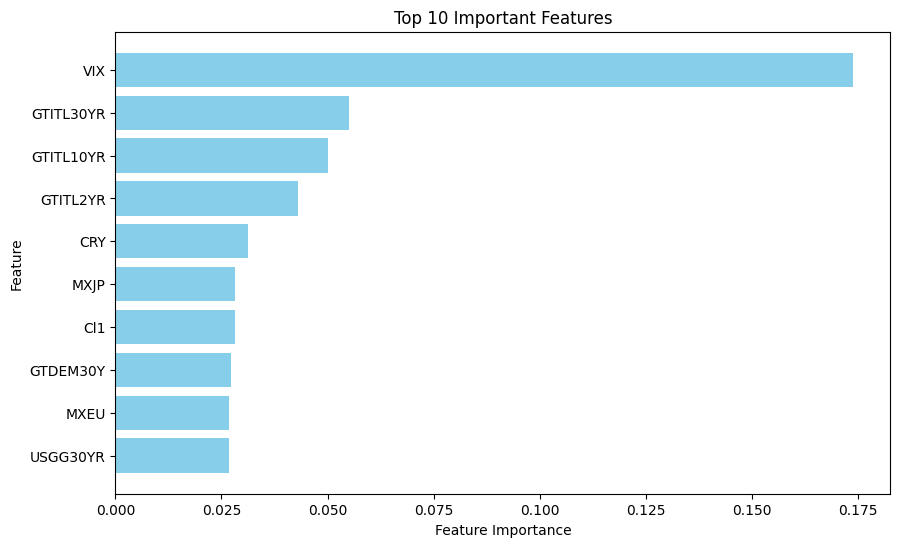

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model, 'optimized_random_forest.pkl')

print("Model saved as 'optimized_random_forest.pkl'")


Model saved as 'optimized_random_forest.pkl'


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the full feature set
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.905829596412556
Confusion Matrix:
 [[171   6]
 [ 15  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.84      0.67      0.75        46

    accuracy                           0.91       223
   macro avg       0.88      0.82      0.84       223
weighted avg       0.90      0.91      0.90       223



In [ ]:
from lightgbm import LGBMClassifier

# Initialize LightGBM
lgb_model = LGBMClassifier(random_state=42)

# Train the model on the full feature set
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10706
[LightGBM] [Info] Number of data points in the train set: 888, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215090 -> initscore=-1.294512
[LightGBM] [Info] Start training from score -1.294512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Results:
Accuracy: 0.9192825112107623
Confusion Matrix:
 [[172   5]
 [ 13  33]]
Classification Report:
               prec

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define parameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40]
}

# Initialize LightGBM
lgb = LGBMClassifier(random_state=42)

# Set up GridSearchCV
lgb_grid = GridSearchCV(
    estimator=lgb,
    param_grid=lgb_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 score
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
lgb_grid.fit(X_train, y_train)

# Display the best parameters and score
print("Best LightGBM Parameters:", lgb_grid.best_params_)
print("Best LightGBM F1 Score:", lgb_grid.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10706
[LightGBM] [Info] Number of data points in the train set: 888, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215090 -> initscore=-1.294512
[LightGBM] [Info] Start training from score -1.294512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
# Get the best LightGBM model
lgb_best_model = lgb_grid.best_estimator_

# Make predictions with the best LightGBM model
y_pred_lgb_best = lgb_best_model.predict(X_test)

# Evaluate LightGBM model predictions
print("Optimized LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb_best))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb_best))


Optimized LightGBM Results:
Accuracy: 0.9237668161434978
Confusion Matrix:
 [[170   7]
 [ 10  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       177
           1       0.84      0.78      0.81        46

    accuracy                           0.92       223
   macro avg       0.89      0.87      0.88       223
weighted avg       0.92      0.92      0.92       223



In [ ]:
import joblib

# Save the optimized LightGBM model
joblib.dump(lgb_best_model, 'optimized_lightgbm_model.pkl')

print("Optimized LightGBM model saved as 'optimized_lightgbm_model.pkl'")


Optimized LightGBM model saved as 'optimized_lightgbm_model.pkl'


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest model (ensure it's the optimized one)
rf = RandomForestClassifier(random_state=42, n_estimators=50, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict probabilities from both models
lgb_probs = lgb_best_model.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

# Average the probabilities
combined_probs = (lgb_probs + rf_probs) / 2

# Convert probabilities to class predictions
combined_predictions = np.argmax(combined_probs, axis=1)

# Evaluate the combined model
print("Combined LightGBM and Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, combined_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, combined_predictions))
print("Classification Report:\n", classification_report(y_test, combined_predictions))


Combined LightGBM and Random Forest Results:
Accuracy: 0.9417040358744395
Confusion Matrix:
 [[173   4]
 [  9  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       177
           1       0.90      0.80      0.85        46

    accuracy                           0.94       223
   macro avg       0.93      0.89      0.91       223
weighted avg       0.94      0.94      0.94       223



In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    # Initialize XGBoost with the trial parameters
    xgb = XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        **param_grid
    )

    # Fit and evaluate using a train/validation split
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    xgb.fit(X_train_opt, y_train_opt)
    y_pred_val = xgb.predict(X_val_opt)

    # Evaluate performance using F1 score
    return f1_score(y_val_opt, y_pred_val)

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)



[I 2025-01-17 13:08:56,952] A new study created in memory with name: no-name-a23e6092-8b61-450f-8aee-57aa831ebc66
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-17 13:08:57,849] Trial 0 finished with value: 0.7241379310344828 and parameters: {'n_estimators': 248, 'max_depth': 6, 'learning_rate': 0.10423446912491233, 'subsample': 0.912264436225718, 'colsample_bytree': 0.9348646573222912, 'gamma': 1.7921315572417202, 'reg_alpha': 8.874529982654678, 'reg_lambda': 3.2579223732739604}. Best is trial 0 with value: 0.7241379310344828.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-17 13:08:57,980] Trial 1 finished with value: 0.6440677966101694 an

Best hyperparameters: {'n_estimators': 254, 'max_depth': 9, 'learning_rate': 0.24918759351028358, 'subsample': 0.6294181868506856, 'colsample_bytree': 0.7560086418046735, 'gamma': 0.8877963426045927, 'reg_alpha': 0.8161872396629318, 'reg_lambda': 6.781992981554362}


In [ ]:
# Train the best model with the full training set
best_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **study.best_params)
best_xgb.fit(X_train, y_train)


# Make predictions with the optimized XGBoost model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
print("Optimized XGBoost Results (via Optuna):")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGBoost Results (via Optuna):
Accuracy: 0.9641255605381166
Confusion Matrix:
 [[175   2]
 [  6  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       177
           1       0.95      0.87      0.91        46

    accuracy                           0.96       223
   macro avg       0.96      0.93      0.94       223
weighted avg       0.96      0.96      0.96       223



In [ ]:
import joblib

# Save the Optuna-tuned XGBoost model
joblib.dump(best_xgb, 'optimized_xgboost_model.pkl')

print("Optimized XGBoost model saved as 'optimized_xgboost_model.pkl'")


Optimized XGBoost model saved as 'optimized_xgboost_model.pkl'


In [ ]:
# Predict probabilities
xgb_probs = best_xgb.predict_proba(X_test)
lgb_probs = lgb_best_model.predict_proba(X_test)

# Average the probabilities
combined_probs = (xgb_probs + lgb_probs) / 2

# Convert probabilities to class predictions
combined_predictions = np.argmax(combined_probs, axis=1)

# Evaluate the combined model
print("Combined XGBoost and LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, combined_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, combined_predictions))
print("Classification Report:\n", classification_report(y_test, combined_predictions))


Combined XGBoost and LightGBM Results:
Accuracy: 0.9282511210762332
Confusion Matrix:
 [[172   5]
 [ 11  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       177
           1       0.88      0.76      0.81        46

    accuracy                           0.93       223
   macro avg       0.91      0.87      0.88       223
weighted avg       0.93      0.93      0.93       223



Top Features by Importance:
      Feature  Importance
8         VIX    0.096161
18  GTITL30YR    0.082927
19  GTITL10YR    0.067197
9    USGG30YR    0.030089
30   LF98TRUU    0.027829
20   GTITL2YR    0.027272
37       MXJP    0.027017
2        BDIY    0.026382
24   GTGBP30Y    0.024422
34   LF94TRUU    0.023020


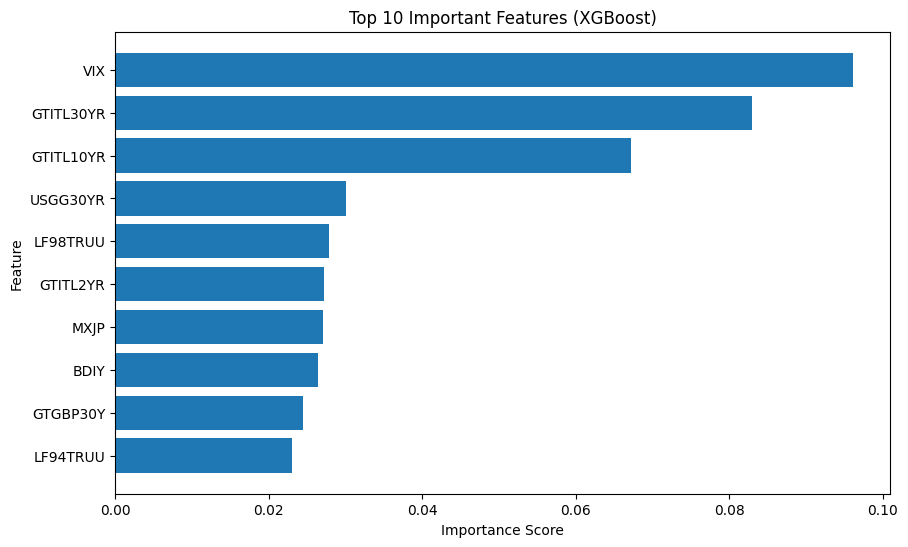

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the optimized XGBoost model
feature_importances = best_xgb.feature_importances_

# Combine feature names and their importance into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:")
print(feature_importance_df.head(10))

# Visualize the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (XGBoost)')
plt.show()


In [ ]:
# List all features in the original dataset
all_features = data_scaled.columns

# Check which features were used in training
used_features = X_train.columns

# Find features excluded from training
excluded_features = set(all_features) - set(used_features)
print("Features excluded from training:", excluded_features)

# Compare features
print("Number of Features in Dataset:", len(all_features))
print("Number of Features Used in Training:", len(used_features))
print("Number of Features Excluded:", len(excluded_features))


Features excluded from training: {'Y', 'Data'}
Number of Features in Dataset: 44
Number of Features Used in Training: 42
Number of Features Excluded: 2
